In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics import f1_score,accuracy_score,precision_score ,confusion_matrix,recall_score

In [10]:
df = pd.read_json('/Users/hercules/Desktop/Galvanize/Course/SpecialTopics:CaseStudy/FraudDetectionCaseStudy/src/fraud-detection-case-study/data/data.json',convert_dates=['approx_payout_date','event_created','event_end','event_published','event_start','user_created','event_published'])

In [11]:
df.head()


,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,2010-04-29 16:43:08,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,2010-09-07 14:35:02,3,,None,NaN,NaN,None,None
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,2010-11-05 19:07:45,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [12]:
df['acct_type'].unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [13]:
acct_type_counts = df.acct_type.value_counts()

In [14]:
df['fraud'] = df['acct_type'].isin(['fraudster_event', 'fraudster', 'fraudster_att'])

In [19]:
df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [30]:
df.venue_state.value_counts()

                             2625
CA                           1377
NY                            762
TX                            487
FL                            406
IL                            352
London                        332
MA                            259
Ontario                       254
Gt Lon                        252
GA                            233
PA                            210
ON                            200
NC                            197
WA                            196
VA                            189
CO                            189
OH                            181
England                       174
MD                            172
NJ                            158
DC                            153
MI                            148
British Columbia              142
NSW                           135
MN                            127
IN                            123
AZ                            119
BC                            108
TN            

In [31]:
df.venue_state.unique()

array([u'FL', u'SC', u'CA', None, u'MA', u'KY', u'MD', u'NC', u'', u'TX',
       u'NY', u'ME', u'MI', u'AZ', u'MN', u'IL', u'British Columbia',
       u'OH', u'DC', u'IN', u'AL', u'IA', u'GA', u'London', u'Ontario',
       u'PA', u'New South Wales', u'VA', u'Suffolk', u'Bournemouth',
       u'MASSACHUSETTS', u'Alberta', u'WA', u'QC', u'Manchester',
       u'Birmingham', u'WI', u'Leeds', u'NJ', u'NV', u'England', u'OR',
       u'CT', u'Ile De France', u'CO', u'ONTARIO', u'South York',
       u'Nova Scotia', u'UT', u'Gt Lon', u'NSW', u'KS', u'Surrey', u'HI',
       u'TN', u'BC', u'Sheffield', u'Berlin', u'West Mids', u'SK',
       u'Scotland', u'QLD', u'AB', u'Newcastle Upon Tyne', u'Derry', u'LA',
       u'ON', u'Hertfordshire', u'Auckland', u'Gloucestershire', u'NE',
       u'OK', u'MO', u'Haute Normandie', u'VIC', u'Glasgow City',
       u'Queensland', u'PACA', u'Warks', u'Sor-Trondelag', u'SA', u'ID',
       u'NH', u'Cardiff', u'Greater London', u'NJ 07102-4398', u'AR',
       u'Edin

In [47]:
df.acct_type.value_counts().plot(kind='bar')

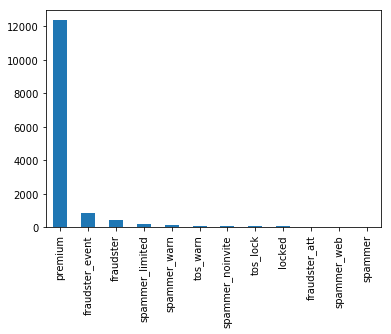

In [48]:
plt.show()

In [49]:
df_fraudster = df[df['acct_type']=='fraudster']

In [50]:
df_fraudster

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,"[{u'event_id': 1386643, u'cost': 300.0, u'avai...",42,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY
54,fraudster,1312761600,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,1311717051,...,"[{u'event_id': 1964043, u'cost': 500.0, u'avai...",0,1311717050,1,Hammersmith Road,,0.000000,0.000000,Olympia Exhibition Hall,
70,fraudster,1322895600,0,13,US,USD,0.0,,yahoo.com,1316795942,...,"[{u'event_id': 2228484, u'cost': 30.0, u'avail...",0,1316795486,1,5801 Security Blvd,US,39.308752,-76.716174,,MD
128,fraudster,1331953200,1045,0,GB,GBP,0.0,"<p><span style=""font-size: medium; color: #ff0...",ymail.com,1330545234,...,"[{u'event_id': 3048157, u'cost': 150.0, u'avai...",0,1330544678,1,67 Old Gate Road,GB,52.740168,-1.043989,Hill Top Caravan Park,
130,fraudster,1331535300,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1331041029,...,"[{u'event_id': 3090085, u'cost': 140.76, u'ava...",306,1304639602,3,,None,NaN,NaN,None,None
131,fraudster,1331964000,1529,11,US,USD,0.0,<p> ALL PROCEEDS WILL GO TOWARD BETTERING OUR ...,yahoo.com,1331162405,...,"[{u'event_id': 3104463, u'cost': 200.0, u'avai...",0,1331161913,1,900 EAST PRINCETON ST.,US,28.570472,-81.367605,The Mennello Museum of American Art,FL
140,fraudster,1333519200,108,6,US,USD,0.0,<p>TODAY'S LIVE Conference Call is scheduled f...,gmail.com,1332979005,...,"[{u'event_id': 3244275, u'cost': 140.76, u'ava...",328,1304639602,3,,None,NaN,NaN,None,None
144,fraudster,1334880000,331,13,US,USD,0.0,<p>Join us for two full days of continuing edu...,inbox.com,1333878951,...,"[{u'event_id': 3310151, u'cost': 235.0, u'avai...",0,1333878950,1,25 South Queen Street,US,40.038758,-76.305574,Lancaster County Convention Center at the Marr...,PA
161,fraudster,1337727600,39,5,US,USD,0.0,<p>The Kimmel Center - Verizon Hall</p>,Safe-mail.net,1336338290,...,"[{u'event_id': 3493645, u'cost': 8.46, u'avail...",0,1336338139,1,,,0.000000,0.000000,,
177,fraudster,1339930800,668,5,US,USD,0.0,"<p><span class=""vevent""><span class=""descripti...",yopmail.com,1339477808,...,"[{u'event_id': 3717486, u'cost': 100.0, u'avai...",0,1339477790,1,475 W Moreland Ave,US,40.182679,-75.115720,,PA


In [51]:
df_fraudster_event = df[df['acct_type']=='fraudster_event']

In [52]:
df_fraudster_event

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,"[{u'event_id': 1928009, u'cost': 30.0, u'avail...",77,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA
149,fraudster_event,1335796200,1946,5,GB,GBP,0.0,"<h1><span style=""font-size: x-large;"">You've d...",zumba-perth.com,1335366629,...,"[{u'event_id': 3423729, u'cost': 35.0, u'avail...",0,1335364397,1,St Catherine's Retail Park,GB,56.399777,-3.438740,,
187,fraudster_event,1354838400,2805,8,CA,CAD,1.0,"<p><span style=""font-family: arial black,avant...",diversity-church.com,1341189474,...,"[{u'event_id': 3833884, u'cost': 2.0, u'availa...",0,1341189473,1,Blow The Whistle On Bullying ~ It Matters Wha...,,0.000000,0.000000,Blow The Whistle On Bullying ~ It Matters What...,
202,fraudster_event,1344189600,2170,5,US,USD,0.0,"<p> </p>\r\n<table style=""width: 801px;"" borde...",gmail.com,1343446512,...,"[{u'event_id': 3998400, u'cost': 100.0, u'avai...",0,1343430886,1,125 E. 11th Street,US,40.731565,-73.989183,Webster Hall,NY
206,fraudster_event,1344409200,0,13,US,USD,0.0,,yahoo.com,1343909121,...,"[{u'event_id': 4031234, u'cost': 300.0, u'avai...",537,1297554190,4,,,0.000000,0.000000,,
212,fraudster_event,1353477600,0,5,US,USD,0.0,,comcast.net,1345486002,...,"[{u'event_id': 4159448, u'cost': 40.0, u'avail...",0,1345486000,1,4746 N Racine Ave,US,41.968562,-87.659700,Riviera Theatre,IL
219,fraudster_event,1348916400,0,11,US,USD,0.0,,gmail.com,1346730451,...,"[{u'event_id': 4260346, u'cost': 10.0, u'avail...",7,1346118291,1,526 E Hospital St,US,31.603631,-94.650802,Live Oak MIssionary Baptist Church,TX
248,fraudster_event,1353888000,1458,8,GB,GBP,0.0,<p>The Master Mind Alliance Success Clubs Inte...,yahoo.co.uk,1349979870,...,"[{u'event_id': 4571224, u'cost': 150.0, u'avai...",0,1349979868,1,1 Weir Road,GB,51.430867,-0.190407,Vantage House,London
250,fraudster_event,1351515600,2893,5,CA,CAD,0.0,"<div style=""margin: 0px; padding: 0px; font-fa...",yahoo.ca,1350330024,...,"[{u'event_id': 4598566, u'cost': 50.0, u'avail...",0,1350330023,3,"600 Queens Quay W, Suite 103,toronto",CA,43.636608,-79.397355,empire sandy,Ontario


In [53]:
df.email_domain.value_counts().plot(kind='bar')

In [ ]:
plt.show()

In [32]:
y = df.pop('fraud')

In [33]:
y

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
14307    False
14308    False
14309    False
14310    False
14311    False
14312    False
14313    False
14314    False
14315    False
14316     True
14317    False
14318     True
14319    False
14320    False
14321    False
14322    False
14323    False
14324    False
14325     True
14326    False
14327    False
14328    False
14329    False
14330    False
14331    False
14332     True
14333    False
14334    False
14335    False
14336     True
Name: fraud, dtype: bool

In [36]:
prob = sum(y)/float(len(y))

In [37]:
prob

0.090186231429169289

In [121]:
def baseline(y_train):
    ''' this model predicts a either 1 or 0 (True or False) based on the probability from the
    training data that a value is either True or False

    for the fraud case_study
    '''
    #imported random
    prob_fraud = sum(y_train)/float(len(y_train))
    isfraud = None
    if random.random() > prob_fraud:
        isfraud = False
    else:
        isfraud = True
    return isfraud

def baseline_stats(y_train,y_test):
    y_pred = []
    for y in range(len(y_test)):
        y_pred.append(baseline(y_train))
    confus_mat = np.array(confusion_matrix(y_test, y_pred))
    return precision_score(y_test,y_pred), accuracy_score(y_test,y_pred), recall_score(y_test,y_pred), f1_score(y_test,y_pred), confus_mat

In [122]:
p,a,r,f,c = baseline_stats(y,y_test)

In [123]:
t = baseline(y)

In [ ]:
scores = []
for i in range(1000):
    scores.append(baseline_stats(y,y_test))

In [124]:
for 

0.68421052631578949

In [125]:
r

0.0

In [126]:
f

0.0

In [127]:
c

array([[13,  3],
       [ 3,  0]])

In [96]:
y_test = [False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False]